# Sistema de Recomendación

Cualquier sistema que provea una recomendación personalizada y que guíe al usuario de forma personalizada hacia objetos relevantes en un espacio amplio de posibles opciones. 

- Es un simil con el proceso social de pedir recomendaciones sobre un tema. 
- No son lo mismo que un Sistema de Búsqueda de Información (Google) o de extracción de información. 
- Son relevantes y generan valor. 

**El problema de recomendación se define como:** <br>
La dificultad de estimar calificaciones para un producto que aún no ha sido visto/calificado por el usuario.

Para contruir la estimación se pueden considerar:
  - Calificaciones por el usuario a otros productos similares (*Item based*)
  - Calificaciones dadas por otro usuario similar. (*User based*) 
  - Información de otros usuarios y la información del objeto, i.e. atributos del objeto, demográficos del usuario. 

**Algebraicamente**, podemos representar un sistema de recomendación con los siguientes conjuntos:

$ U = \{ u_1, u_2,... , u_n \} $ conjunto de todos los usuarios \\

$ I = \{ i_1, i_2,... , i_m \} $ conjunto de todos los items/productos \\
<br>
También, se define una función *f* que mide la utilidad del item **i** al usuario **u**.<br>
$ f_ : U x I \to R$  \\

Donde $R$ se entiende como un conjunto ordenado, por ejemplo: números del 1 al 5, o, 1 y 0. 

*La utilidad es representada comunmente por una calificación, que indica como un usuario es particular prefiere un item en particular.* 
 

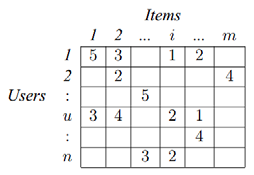

Los sistemas de recomendación se pueden categorizar en dos, basado en en su modo de recomendar:

- El problema de predicción 
- El problema de clasificación 

**Tipos de Sistemas de Recomendación**

- Filtros colaborativos:
  - Filtros basados en el usuario
  - Filtros basados en items
- Sistemas basados en contenido: recomienda un item parecidos a items que ya calificó el usuario.
- Sistemas basados en conocimiento
- Recomendadores Híbridos

--------------------- **Práctica** ---------------------

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
# from google.colab import drive

ModuleNotFoundError: No module named 'google'

In [ ]:
# drive.mount('/content/drive')

Mounted at /content/drive


Exploración del dataset

In [2]:
ratings = pd.read_csv('../../datasets/movie_ratings.csv', index_col = 'Movie')
ratings.head()

,Brandon,Emily,Cleo,Rusty,Samantha
Movie,,,,,
Aquaman,4,1,2,2,2
Avengers: Infinity War,2,5,2,5,5
Black Panther,5,2,5,1,1
Bohemian Rhapsody,2,3,4,4,1
Deadpool 2,3,2,4,5,1


In [3]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Aquaman to Venom
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Brandon   10 non-null     int64
 1   Emily     10 non-null     int64
 2   Cleo      10 non-null     int64
 3   Rusty     10 non-null     int64
 4   Samantha  10 non-null     int64
dtypes: int64(5)
memory usage: 480.0+ bytes


In [4]:
ratings = ratings.T
ratings

Movie,Aquaman,Avengers: Infinity War,Black Panther,Bohemian Rhapsody,Deadpool 2,Fantastic Beasts: The Crimes of Grindelwald,Incredibles 2,Jurassic World: Fallen Kingdom,Mission: Impossible – Fallout,Venom
Brandon,4,2,5,2,3,5,4,2,5,4
Emily,1,5,2,3,2,4,2,3,5,1
Cleo,2,2,5,4,4,1,3,5,4,4
Rusty,2,5,1,4,5,2,4,4,3,5
Samantha,2,5,1,1,1,5,4,5,2,2


In [ ]:
user = list(ratings.index)
user

['Brandon', 'Emily', 'Cleo', 'Rusty', 'Samantha']

In [ ]:
movies = list(ratings.columns)
movies

['Aquaman',
 'Avengers: Infinity War',
 'Black Panther',
 'Bohemian Rhapsody',
 'Deadpool 2',
 'Fantastic Beasts: The Crimes of Grindelwald',
 'Incredibles 2',
 'Jurassic World: Fallen Kingdom',
 'Mission: Impossible – Fallout',
 'Venom']

# Enumerate(iterable) = (n, elemento)

In [ ]:
for i, txt in enumerate(user):
  print(i, txt)

0 Brandon
1 Emily
2 Cleo
3 Rusty
4 Samantha


Gráfica del **Espacio de preferencias**

In [ ]:
# Enumerate(iterable) = (n,elemento)


In [ ]:
def ratings_scatter(movie_1, movie_2):
  x = ratings[movie_1]
  y = ratings[movie_2]
  n = user

  fig, ax = plt.subplots()
  ax.scatter(x, y, s = 10, marker = '.')
  fig.set_figwidth(7)
  fig.set_figheight(7)
  plt.title('Espacio de preferencias \n' + movie_1 + ' vs ' + movie_2, fontsize = 10)
  ax.set_xlabel(movie_1, fontsize = 10)
  ax.set_ylabel(movie_2, fontsize = 10)

  for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]), fontsize = 8)


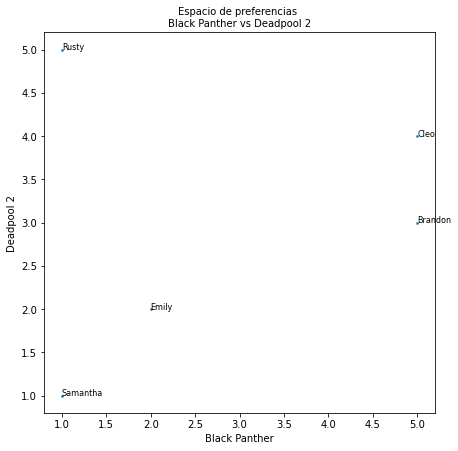

In [ ]:
ratings_scatter('Black Panther','Deadpool 2')

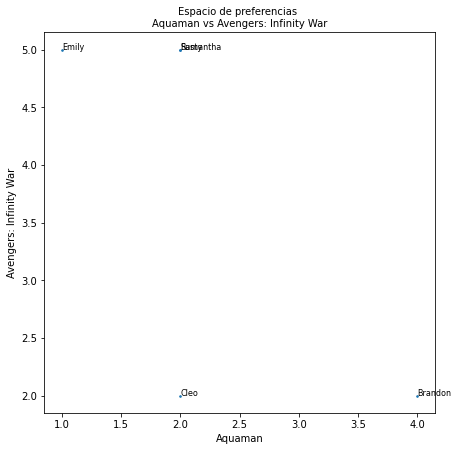

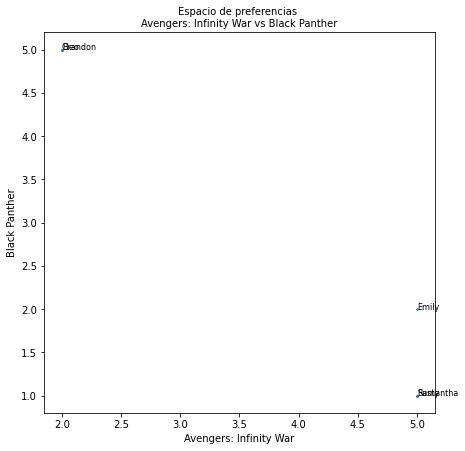

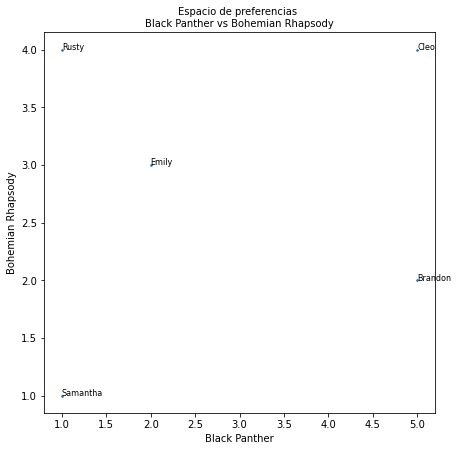

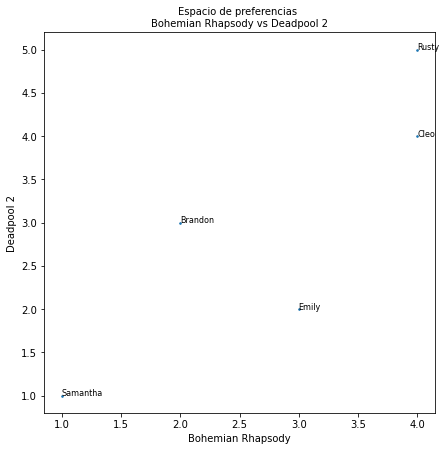

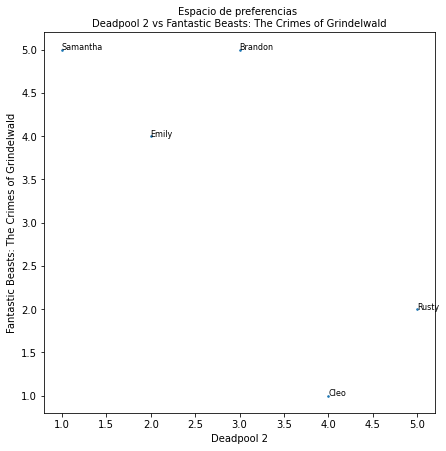

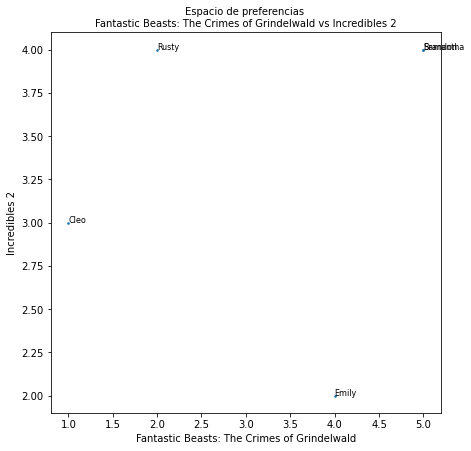

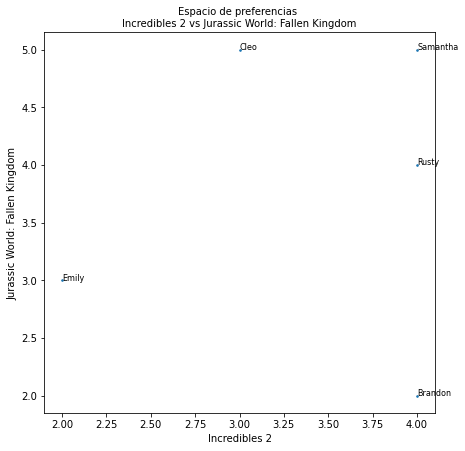

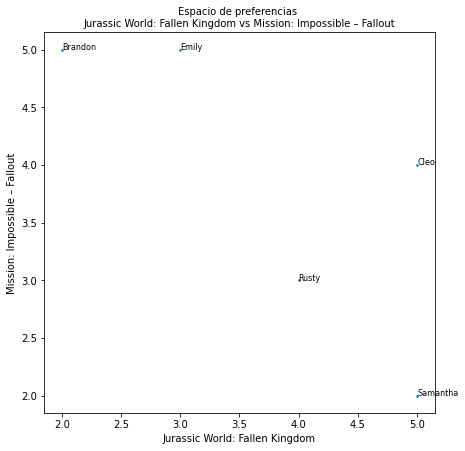

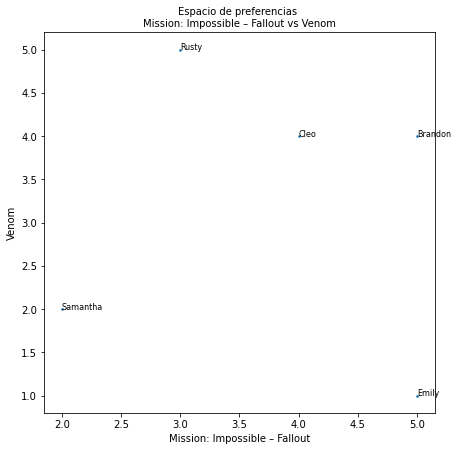

In [ ]:
for i in range(len(movies)-1):
  ratings_scatter(movies[i], movies[i+1])

In [ ]:
import itertools

In [ ]:
movies_comb = itertools.combinations(movies, 2)
movies_comb

In [ ]:
for i in movies_comb:
  print(i)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


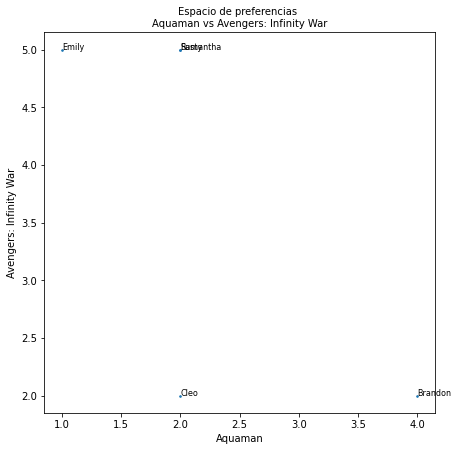

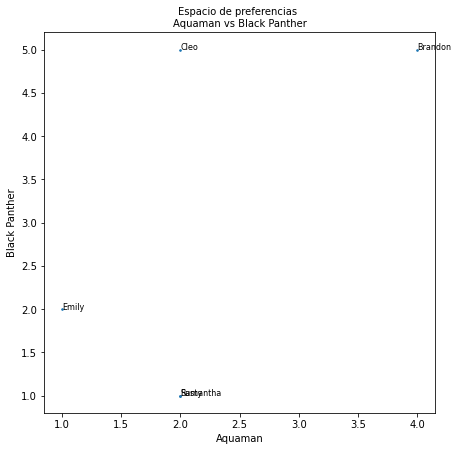

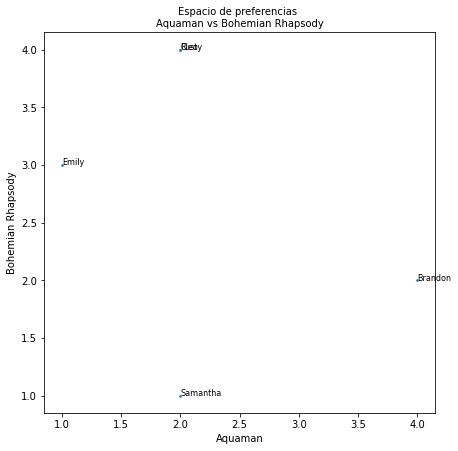

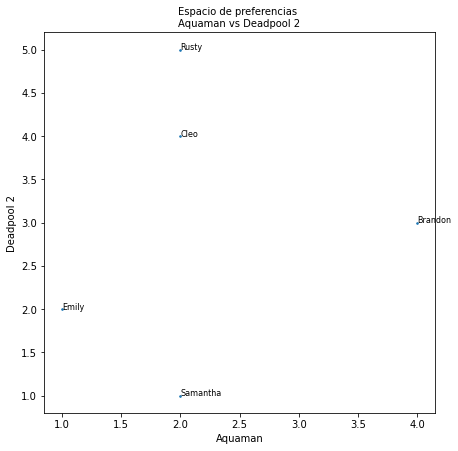

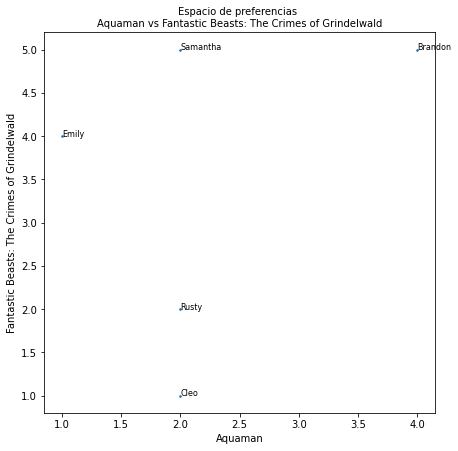

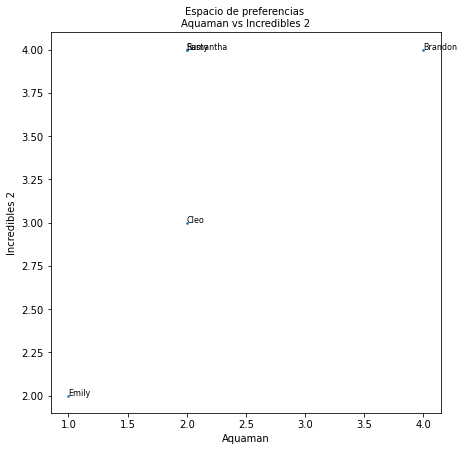

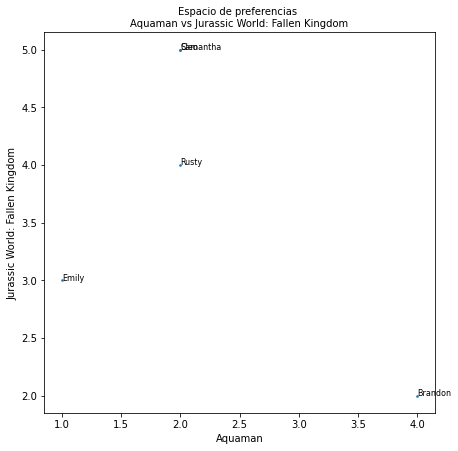

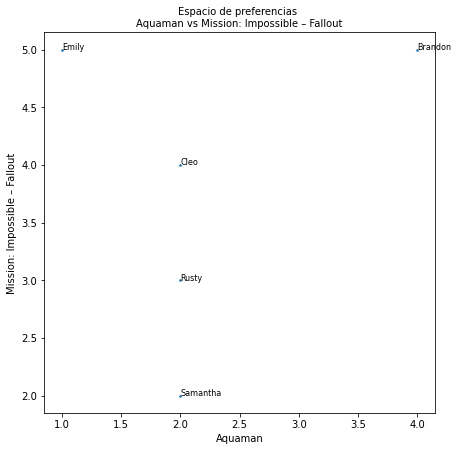

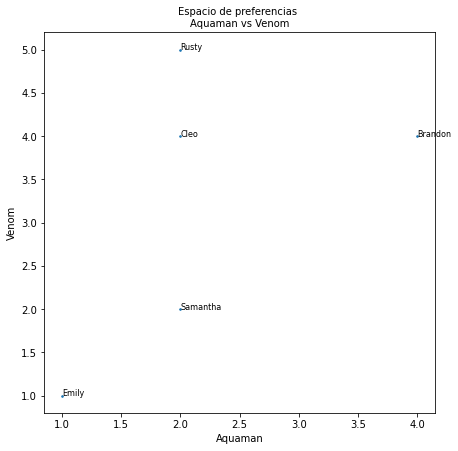

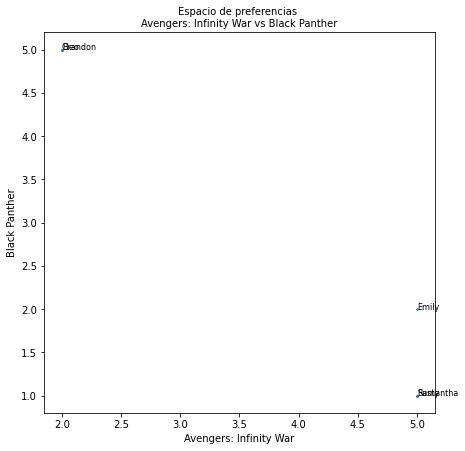

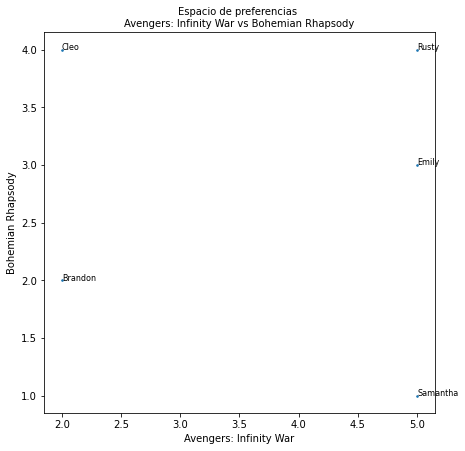

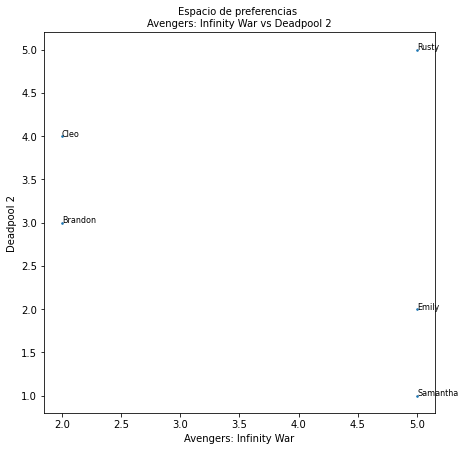

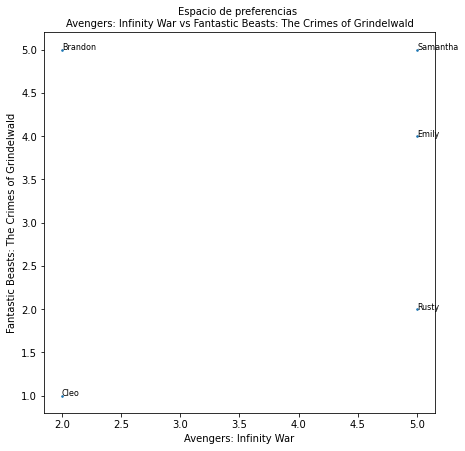

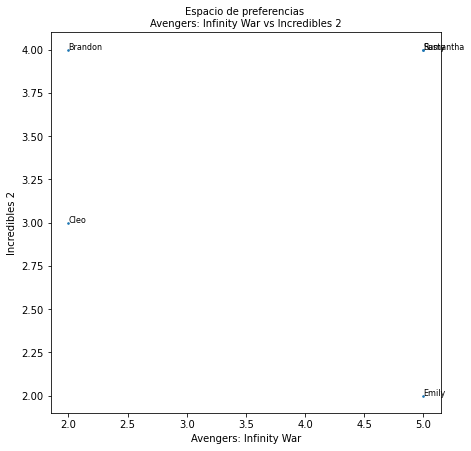

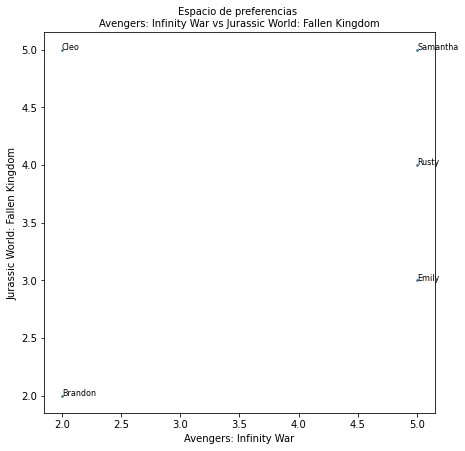

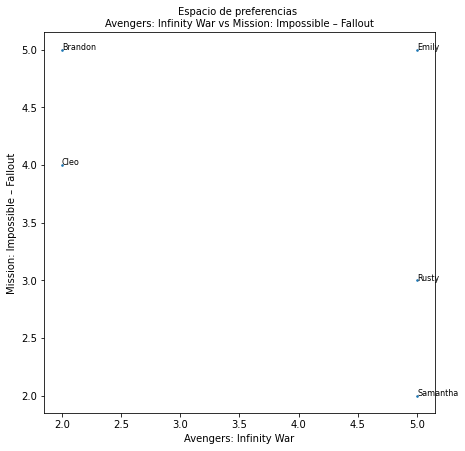

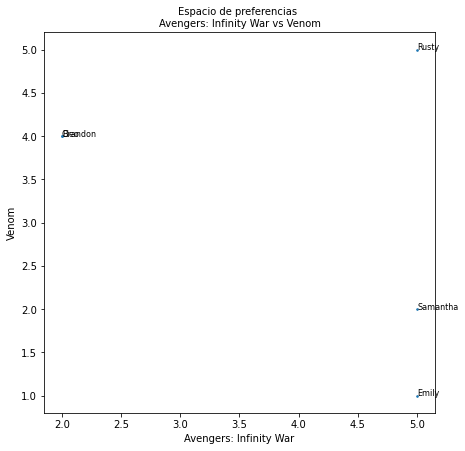

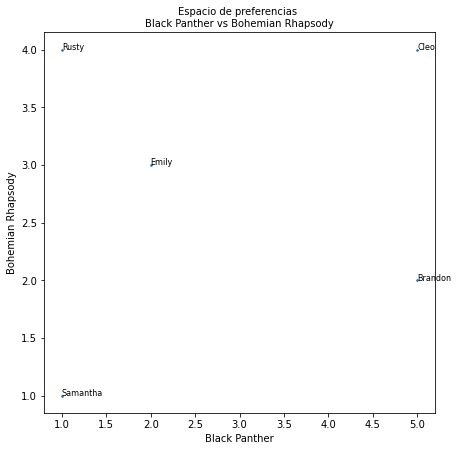

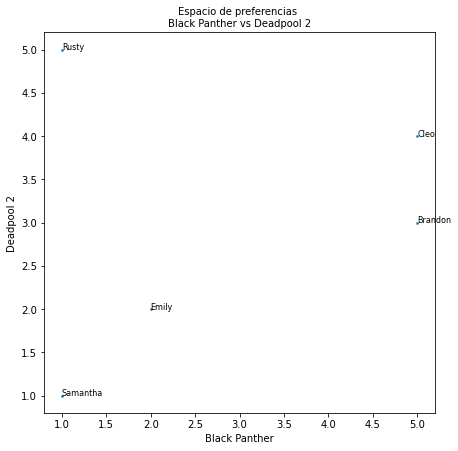

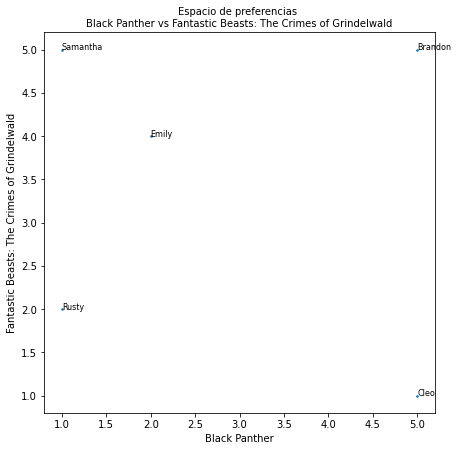

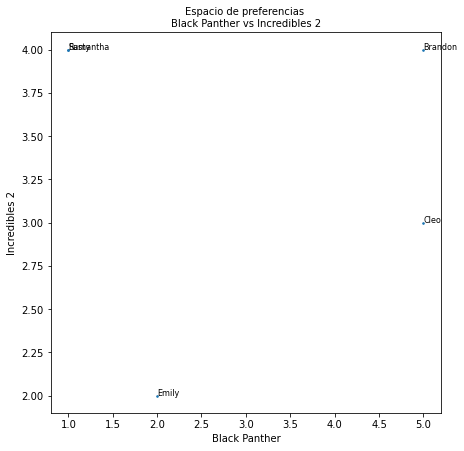

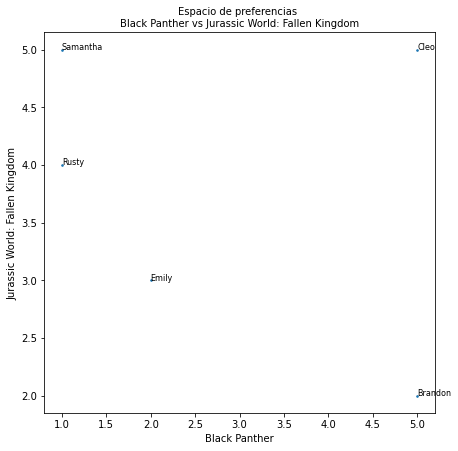

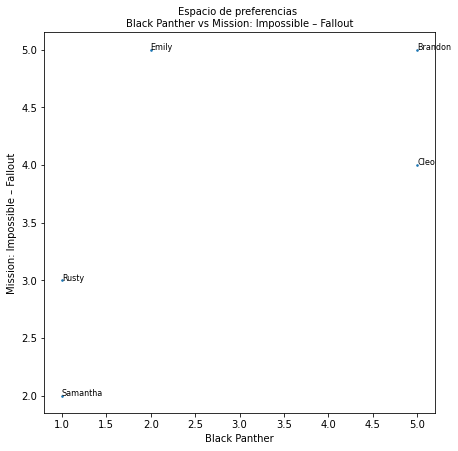

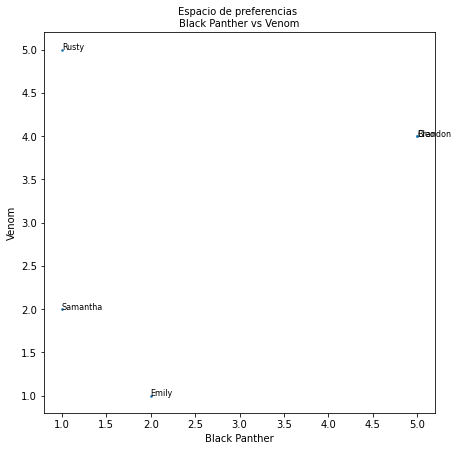

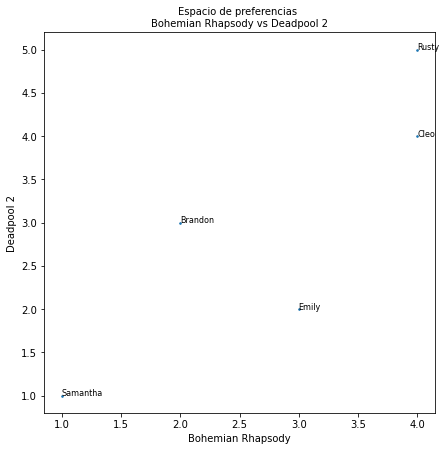

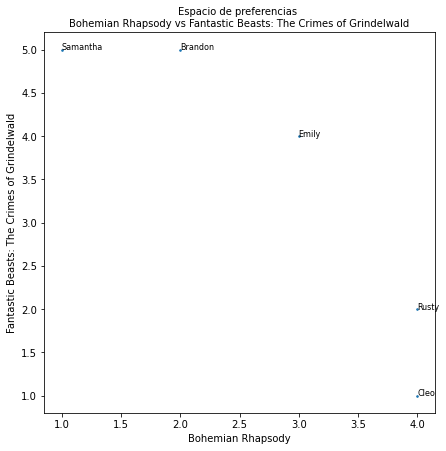

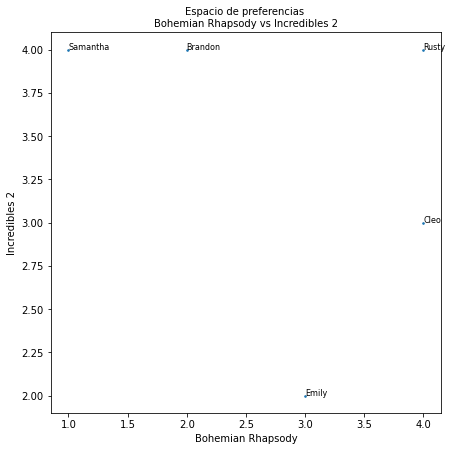

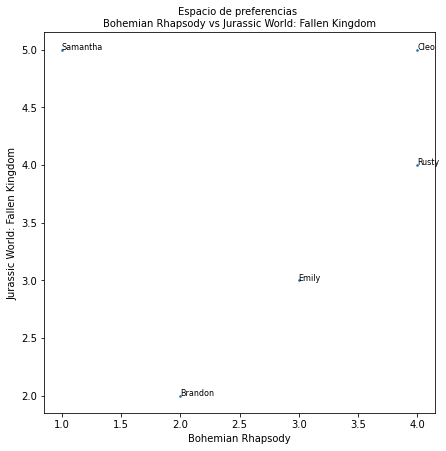

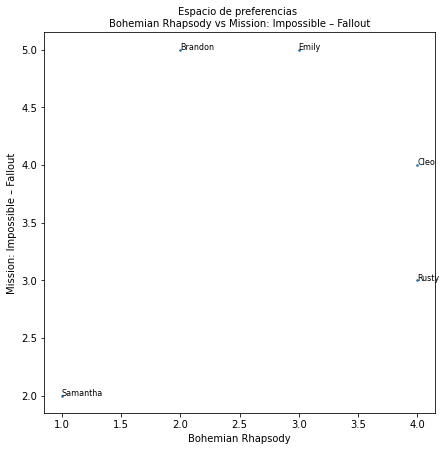

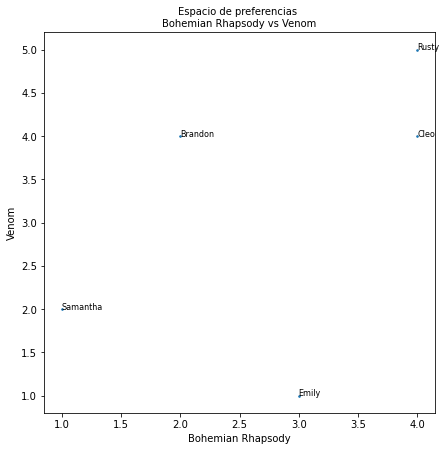

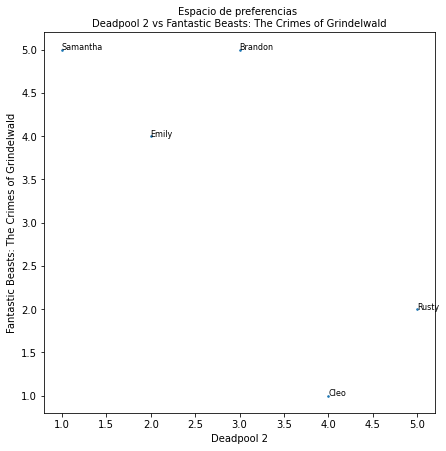

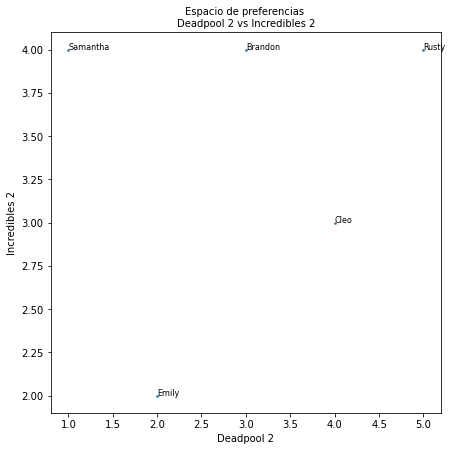

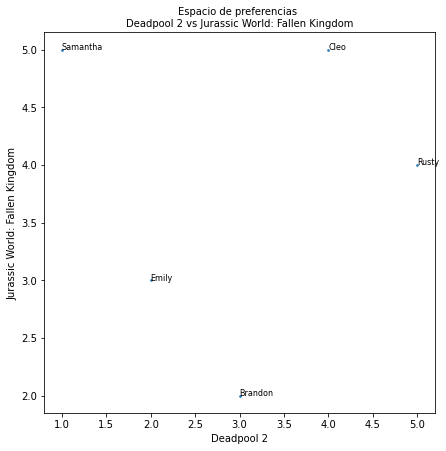

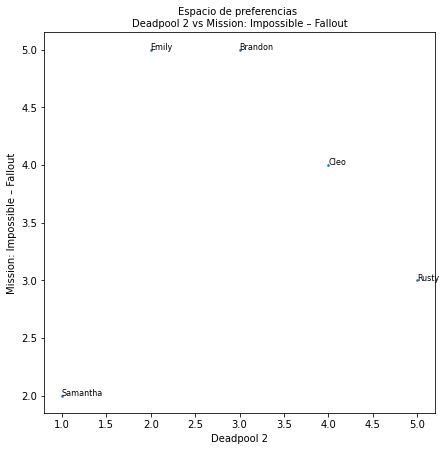

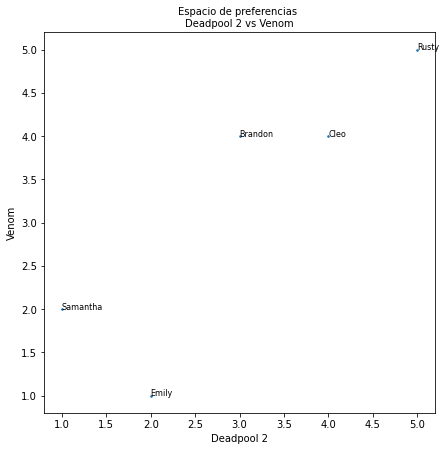

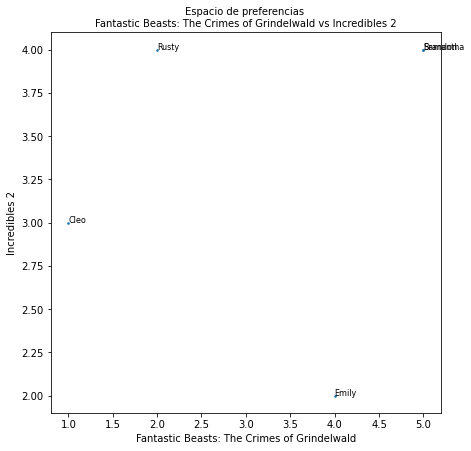

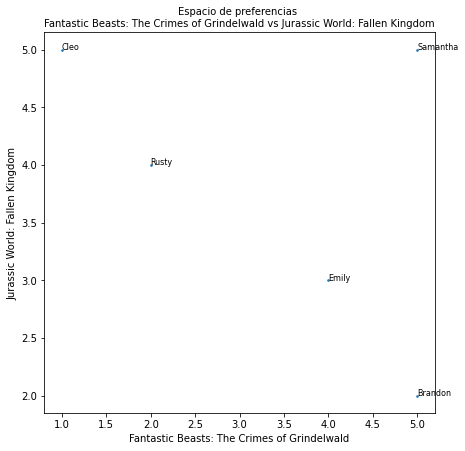

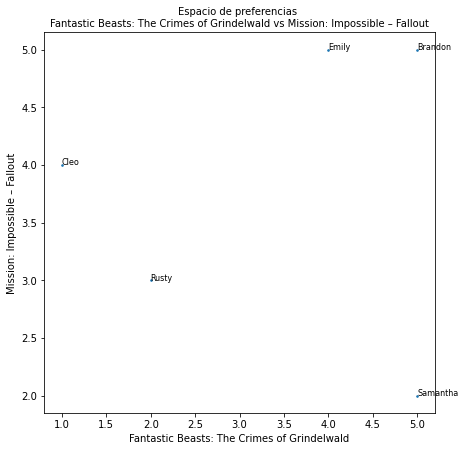

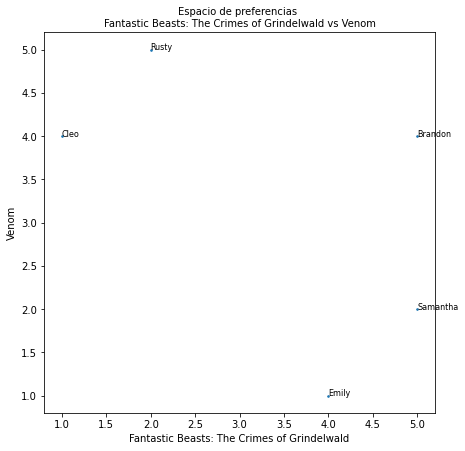

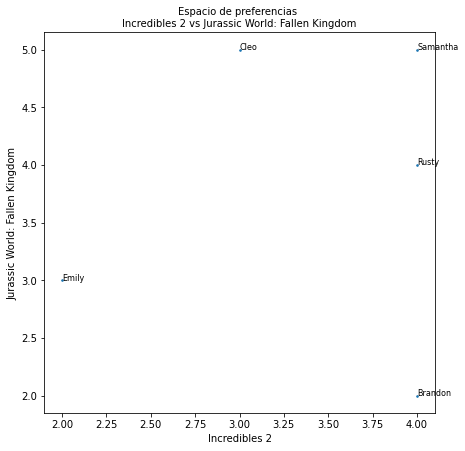

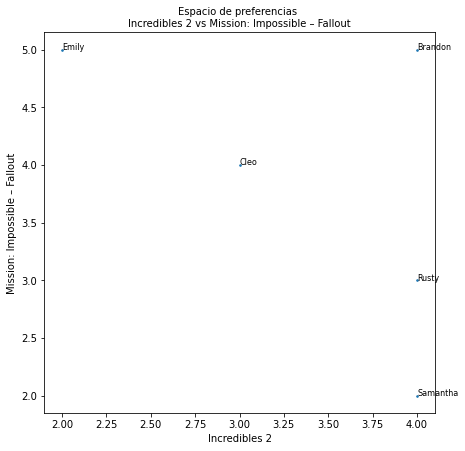

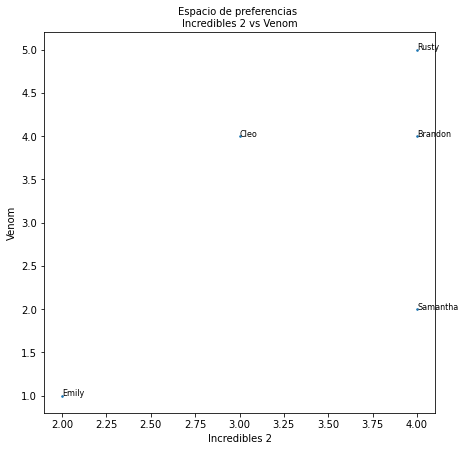

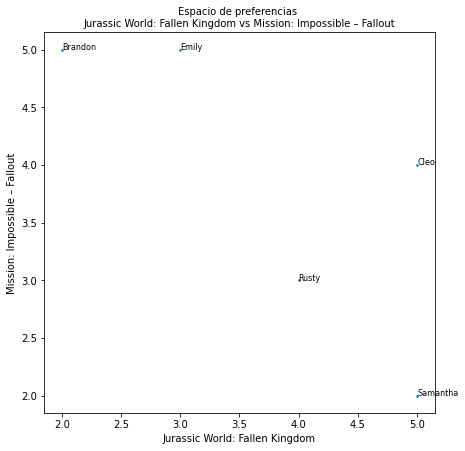

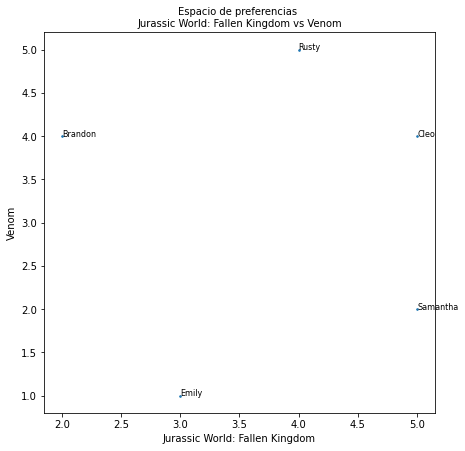

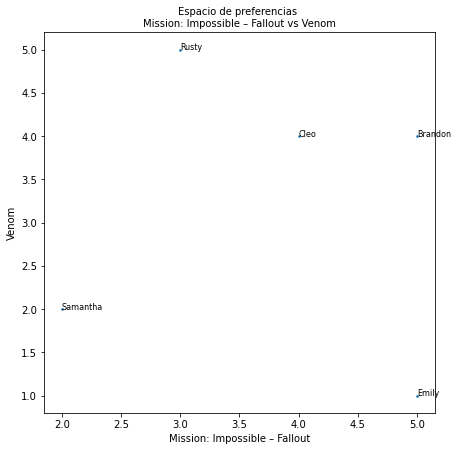

In [ ]:
for mov_1, mov_2 in movies_comb:
  ratings_scatter(mov_1, mov_2)

**Distancia Euclidiana** <br>
$ D(X,Y) = \sqrt{\sum_{i=1}^{n}(y_i - x_i)^2 }$


In [ ]:
Tenemos 5 y 2 lugares:
Brandon vs Emily  = 6.63
Brandon vs Cleo = 6
Brandon vs Rusty = 7.41

In [ ]:
brandon_vs_emily = ((4-1)**2 + (2-5)**2 + (5-2)**2 + (2-3)**2 + (3-2)**2 + (5-4)**2 + (4-2)**2 + (2-3)**2 + (5-5)**2 + (4-1)**2)**.5
brandon_vs_emily

6.6332495807108

https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html

In [ ]:
pdist(ratings, metric= 'euclidean')

array([6.63324958, 6.        , 7.41619849, 7.48331477, 6.92820323,
       6.40312424, 5.09901951, 5.56776436, 8.24621125, 6.70820393])

In [ ]:
squareform(pdist(ratings, metric='euclidean'))

array([[0.        , 6.63324958, 6.        , 7.41619849, 7.48331477],
       [6.63324958, 0.        , 6.92820323, 6.40312424, 5.09901951],
       [6.        , 6.92820323, 0.        , 5.56776436, 8.24621125],
       [7.41619849, 6.40312424, 5.56776436, 0.        , 6.70820393],
       [7.48331477, 5.09901951, 8.24621125, 6.70820393, 0.        ]])

In [ ]:
1 + squareform(pdist(ratings, metric='euclidean'))

array([[1.        , 7.63324958, 7.        , 8.41619849, 8.48331477],
       [7.63324958, 1.        , 7.92820323, 7.40312424, 6.09901951],
       [7.        , 7.92820323, 1.        , 6.56776436, 9.24621125],
       [8.41619849, 7.40312424, 6.56776436, 1.        , 7.70820393],
       [8.48331477, 6.09901951, 9.24621125, 7.70820393, 1.        ]])

In [ ]:
1 / (1 +squareform(pdist(ratings, metric='euclidean')))

array([[1.        , 0.1310058 , 0.14285714, 0.11881849, 0.11787845],
       [0.1310058 , 1.        , 0.12613198, 0.13507811, 0.16396078],
       [0.14285714, 0.12613198, 1.        , 0.15225881, 0.10815241],
       [0.11881849, 0.13507811, 0.15225881, 1.        , 0.12973191],
       [0.11787845, 0.16396078, 0.10815241, 0.12973191, 1.        ]])

In [ ]:
dist_eucl = 1 / (1 +squareform(pdist(ratings, metric='euclidean')))
dist_eucl

array([[1.        , 0.1310058 , 0.14285714, 0.11881849, 0.11787845],
       [0.1310058 , 1.        , 0.12613198, 0.13507811, 0.16396078],
       [0.14285714, 0.12613198, 1.        , 0.15225881, 0.10815241],
       [0.11881849, 0.13507811, 0.15225881, 1.        , 0.12973191],
       [0.11787845, 0.16396078, 0.10815241, 0.12973191, 1.        ]])

In [ ]:
dist_cosine = 1 / (1 +squareform(pdist(ratings, metric='cosine')))
dist_cosine

array([[1.        , 0.85717409, 0.88525994, 0.83826671, 0.82312842],
       [0.85717409, 1.        , 0.8333991 , 0.86370322, 0.88748526],
       [0.88525994, 0.8333991 , 1.        , 0.89841527, 0.78038819],
       [0.83826671, 0.86370322, 0.89841527, 1.        , 0.85189757],
       [0.82312842, 0.88748526, 0.78038819, 0.85189757, 1.        ]])

In [ ]:
dist_city = 1 / (1 +squareform(pdist(ratings, metric='cityblock')))
dist_city

array([[1.        , 0.05263158, 0.06666667, 0.04545455, 0.04761905],
       [0.05263158, 1.        , 0.04761905, 0.05555556, 0.06666667],
       [0.06666667, 0.04761905, 1.        , 0.07142857, 0.04347826],
       [0.04545455, 0.05555556, 0.07142857, 1.        , 0.0625    ],
       [0.04761905, 0.06666667, 0.04347826, 0.0625    , 1.        ]])

Matriz de Relación



In [ ]:
distance = pd.DataFrame(dist_eucl, index = ratings.index, columns = ratings.index )
distance

,Brandon,Emily,Cleo,Rusty,Samantha
Brandon,1.000000,0.131006,0.142857,0.118818,0.117878
Emily,0.131006,1.000000,0.126132,0.135078,0.163961
Cleo,0.142857,0.126132,1.000000,0.152259,0.108152
Rusty,0.118818,0.135078,0.152259,1.000000,0.129732
Samantha,0.117878,0.163961,0.108152,0.129732,1.000000


In [ ]:
Cris = {'Aquaman':3,
 'Avengers: Infinity War':5,
 'Black Panther':5,
 'Bohemian Rhapsody':4,
 'Deadpool 2':5,
 'Fantastic Beasts: The Crimes of Grindelwald':3,
 'Incredibles 2':5,
 'Jurassic World: Fallen Kingdom':4,
 'Mission: Impossible – Fallout':4,
 'Venom':5}

In [ ]:
ratings.loc['Cris'] = list(Cris.values())

In [ ]:
ratings

Movie,Aquaman,Avengers: Infinity War,Black Panther,Bohemian Rhapsody,Deadpool 2,Fantastic Beasts: The Crimes of Grindelwald,Incredibles 2,Jurassic World: Fallen Kingdom,Mission: Impossible – Fallout,Venom
Brandon,4,2,5,2,3,5,4,2,5,4
Emily,1,5,2,3,2,4,2,3,5,1
Cleo,2,2,5,4,4,1,3,5,4,4
Rusty,2,5,1,4,5,2,4,4,3,5
Samantha,2,5,1,1,1,5,4,5,2,2
Cris,3,5,5,4,5,3,5,4,4,5


In [ ]:
distances = pd.DataFrame(1 / (1 + squareform(pdist(ratings, metric = 'euclidean')) ),
                         index=ratings.index, columns=ratings.index)

distances

,Brandon,Emily,Cleo,Rusty,Samantha,Cris
Brandon,1.000000,0.131006,0.142857,0.118818,0.117878,0.156613
Emily,0.131006,1.000000,0.126132,0.135078,0.163961,0.122829
Cleo,0.142857,0.126132,1.000000,0.152259,0.108152,0.179129
Rusty,0.118818,0.135078,0.152259,1.000000,0.129732,0.182744
Samantha,0.117878,0.163961,0.108152,0.129732,1.000000,0.113504
Cris,0.156613,0.122829,0.179129,0.182744,0.113504,1.000000


In [ ]:
similarities = distances['Cris'].sort_values(ascending = False)[1:]
similarities

Rusty       0.182744
Cleo        0.179129
Brandon     0.156613
Emily       0.122829
Samantha    0.113504
Name: Cris, dtype: float64

# Otras Peliculas

In [ ]:
new_ratings = pd.read_csv('/content/drive/MyDrive/datasets/movie_ratings2.csv', index_col= 'Movie')
new_ratings

,Brandon,Emily,Cleo,Rusty,Samantha
Movie,,,,,
Beauty and the Beast,2,5,2,5,2
Despicable Me 3,4,5,5,1,2
Guardians of the Galaxy Vol. 2,4,1,5,4,2
Jumanji: Welcome to the Jungle,4,3,3,2,5
Spider-Man: Homecoming,1,3,5,2,5
Star Wars: The Last Jedi,5,4,1,2,2
The Fate of the Furious,2,1,3,3,3
Thor: Ragnarok,4,3,4,1,5
Wolf Warrior 2,5,3,2,3,4


In [ ]:
recommendations = new_ratings.copy()
recommendations

,Brandon,Emily,Cleo,Rusty,Samantha
Movie,,,,,
Beauty and the Beast,2,5,2,5,2
Despicable Me 3,4,5,5,1,2
Guardians of the Galaxy Vol. 2,4,1,5,4,2
Jumanji: Welcome to the Jungle,4,3,3,2,5
Spider-Man: Homecoming,1,3,5,2,5
Star Wars: The Last Jedi,5,4,1,2,2
The Fate of the Furious,2,1,3,3,3
Thor: Ragnarok,4,3,4,1,5
Wolf Warrior 2,5,3,2,3,4


In [ ]:
dict(similarities).items()

dict_items([('Rusty', 0.1827439976315568), ('Cleo', 0.179128784747792), ('Brandon', 0.1566130288262323), ('Emily', 0.122828568570857), ('Samantha', 0.11350416126511091)])

In [ ]:
for name, score in dict(similarities).items():
  recommendations[name] = recommendations[name] * score
recommendations

,Brandon,Emily,Cleo,Rusty,Samantha
Movie,,,,,
Beauty and the Beast,0.313226,0.614143,0.358258,0.913720,0.227008
Despicable Me 3,0.626452,0.614143,0.895644,0.182744,0.227008
Guardians of the Galaxy Vol. 2,0.626452,0.122829,0.895644,0.730976,0.227008
Jumanji: Welcome to the Jungle,0.626452,0.368486,0.537386,0.365488,0.567521
Spider-Man: Homecoming,0.156613,0.368486,0.895644,0.365488,0.567521
Star Wars: The Last Jedi,0.783065,0.491314,0.179129,0.365488,0.227008
The Fate of the Furious,0.313226,0.122829,0.537386,0.548232,0.340512
Thor: Ragnarok,0.626452,0.368486,0.716515,0.182744,0.567521
Wolf Warrior 2,0.783065,0.368486,0.358258,0.548232,0.454017


In [ ]:
recommendations['Total'] = recommendations.mean(axis=1)
recommendations.sort_values('Total', ascending=False)

,Brandon,Emily,Cleo,Rusty,Samantha,Total
Movie,,,,,,
Wonder Woman,0.626452,0.368486,0.716515,0.548232,0.454017,0.904567
Guardians of the Galaxy Vol. 2,0.626452,0.122829,0.895644,0.730976,0.227008,0.867636
Despicable Me 3,0.626452,0.614143,0.895644,0.182744,0.227008,0.848664
Wolf Warrior 2,0.783065,0.368486,0.358258,0.548232,0.454017,0.837352
Jumanji: Welcome to the Jungle,0.626452,0.368486,0.537386,0.365488,0.567521,0.821778
Thor: Ragnarok,0.626452,0.368486,0.716515,0.182744,0.567521,0.820573
Beauty and the Beast,0.313226,0.614143,0.358258,0.913720,0.227008,0.808785
Spider-Man: Homecoming,0.156613,0.368486,0.895644,0.365488,0.567521,0.784584
Star Wars: The Last Jedi,0.783065,0.491314,0.179129,0.365488,0.227008,0.682002
